<p style="font-size:32px">KnowleDGAble: Know Legitimate from DGA</p>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Legitimate:-Alexa-Top-1M-Data" data-toc-modified-id="Legitimate:-Alexa-Top-1M-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Legitimate: Alexa Top 1M Data</a></span></li><li><span><a href="#Malicious:-DGA-Data" data-toc-modified-id="Malicious:-DGA-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Malicious: DGA Data</a></span></li><li><span><a href="#Create-labeled-dataset" data-toc-modified-id="Create-labeled-dataset-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Create labeled dataset</a></span></li></ul></li><li><span><a href="#Approach" data-toc-modified-id="Approach-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Approach</a></span><ul class="toc-item"><li><span><a href="#Considerations" data-toc-modified-id="Considerations-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Considerations</a></span></li><li><span><a href="#Alternatives" data-toc-modified-id="Alternatives-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Alternatives</a></span></li><li><span><a href="#Approach-1:-Using-Features" data-toc-modified-id="Approach-1:-Using-Features-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Approach 1: Using Features</a></span><ul class="toc-item"><li><span><a href="#compute-general-stats" data-toc-modified-id="compute-general-stats-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>compute general stats</a></span></li><li><span><a href="#compute-n-gram-stats" data-toc-modified-id="compute-n-gram-stats-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>compute n-gram stats</a></span></li><li><span><a href="#extracting-features-based-on-n-grams" data-toc-modified-id="extracting-features-based-on-n-grams-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>extracting features based on n-grams</a></span><ul class="toc-item"><li><span><a href="#Split-data-to-train-and-test" data-toc-modified-id="Split-data-to-train-and-test-3.3.3.1"><span class="toc-item-num">3.3.3.1&nbsp;&nbsp;</span>Split data to train and test</a></span></li><li><span><a href="#plot-the-features-for-test-data" data-toc-modified-id="plot-the-features-for-test-data-3.3.3.2"><span class="toc-item-num">3.3.3.2&nbsp;&nbsp;</span>plot the features for test data</a></span></li></ul></li><li><span><a href="#Building-a-preliminary-model" data-toc-modified-id="Building-a-preliminary-model-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Building a preliminary model</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-classifier" data-toc-modified-id="Logistic-Regression-classifier-3.3.4.1"><span class="toc-item-num">3.3.4.1&nbsp;&nbsp;</span>Logistic Regression classifier</a></span></li><li><span><a href="#Decision-Tree-classifier" data-toc-modified-id="Decision-Tree-classifier-3.3.4.2"><span class="toc-item-num">3.3.4.2&nbsp;&nbsp;</span>Decision Tree classifier</a></span></li><li><span><a href="#Decision-tree-classifier-with-cost-complexity-pruning" data-toc-modified-id="Decision-tree-classifier-with-cost-complexity-pruning-3.3.4.3"><span class="toc-item-num">3.3.4.3&nbsp;&nbsp;</span>Decision tree classifier with cost complexity pruning</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></li><li><span><a href="#References-and-Further-Reading" data-toc-modified-id="References-and-Further-Reading-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>References and Further Reading</a></span></li><li><span><a href="#Thoughts-on-open-source-models" data-toc-modified-id="Thoughts-on-open-source-models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Thoughts on open source models</a></span><ul class="toc-item"><li><span><a href="#embedding" data-toc-modified-id="embedding-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>embedding</a></span></li></ul></li></ul></div>

# Problem Statement

Take a user input as a domain name and find out if it is a valid domain or auto generated domain using machine learning approach.
  - Domain can be 255 char long
  - Domain will contain one TLD (.com, .ca, .io) at the end

The solution needs to be able to detect domains from at least 2 malware families from the link given below.
e.g.
```
Google.com is valid
Bind.com is valid
Lkhylm0mhyfuhg.ddns.net is DGA (ignore ddns.net)
Aktklyvbiu.com is DGA
Btpnxlsfdqbhzazyx.net is DGA
```

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk import ngrams

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

%matplotlib inline

# Data
## Legitimate: Alexa Top 1M Data 

In [79]:
# load Alexa top 1M domain names
top_df = pd.read_csv('data/top-1m.csv.zip', header=None)
top_df.columns = ['rank', 'domain']
print(top_df.dtypes)
top_df


rank       int64
domain    object
dtype: object


,rank,domain
0,1,google.com
1,2,youtube.com
2,3,tmall.com
3,4,baidu.com
4,5,qq.com
...,...,...
756452,756453,toptutorialsonline.net
756453,756454,trainyourtechskills.com
756454,756455,uknews247.com
756455,756456,webzbugz.com


## Malicious: DGA Data

  - Where to get the malicious domain names?
    - Should I use the malware implementations (link below) to generate?
    - I found a data set from netlab 360 (link below).

In [80]:
dga_df = pd.read_csv('./data/netlab360_dga.zip', sep='\t', skiprows=19, header=None)
dga_df.columns = ['family', 'domain', 'date1', 'date2']
print(dga_df.dtypes)
dga_df

family    object
domain    object
date1     object
date2     object
dtype: object


,family,domain,date1,date2
0,nymaim,xfudzjtxf.info,2020-09-16 00:00:00,2020-09-16 23:59:59
1,nymaim,wtzwhmej.com,2020-09-16 00:00:00,2020-09-16 23:59:59
2,nymaim,dbmvia.com,2020-09-16 00:00:00,2020-09-16 23:59:59
3,nymaim,gkegmfot.biz,2020-09-16 00:00:00,2020-09-16 23:59:59
4,nymaim,jevylwpv.biz,2020-09-16 00:00:00,2020-09-16 23:59:59
...,...,...,...,...
1316731,simda,qexukog.in,1970-01-01 00:00:00,2030-01-01 00:00:00
1316732,simda,zugulid.in,1970-01-01 00:00:00,2030-01-01 00:00:00
1316733,simda,diruxus.in,1970-01-01 00:00:00,2030-01-01 00:00:00
1316734,simda,navyvyt.in,1970-01-01 00:00:00,2030-01-01 00:00:00


[('banjori', 452403), ('emotet', 412986), ('rovnix', 180000), ('tinba', 100679), ('pykspa_v1', 44635), ('simda', 25332), ('ramnit', 20027), ('gameover', 12000), ('ranbyus', 11160), ('virut', 9751), ('murofet', 8560), ('necurs', 8185), ('shiotob', 8004), ('symmi', 4256), ('shifu', 2546), ('suppobox', 2316), ('qadars', 2000), ('locky', 1158), ('cryptolocker', 1000), ('chinad', 1000), ('dyre', 1000), ('bigviktor', 1000), ('matsnu', 908), ('vawtrak', 822), ('pykspa_v2_fake', 800), ('dircrypt', 763), ('enviserv', 500), ('conficker', 494), ('nymaim', 479), ('fobber_v2', 299), ('fobber_v1', 298), ('feodo', 263), ('pykspa_v2_real', 200), ('tempedreve', 195), ('padcrypt', 168), ('bamital', 104), ('proslikefan', 100), ('vidro', 100), ('gspy', 100), ('mydoom', 50), ('omexo', 38), ('tinynuke', 32), ('tofsee', 20), ('blackhole', 2), ('madmax', 1), ('xshellghost', 1), ('ccleaner', 1)]


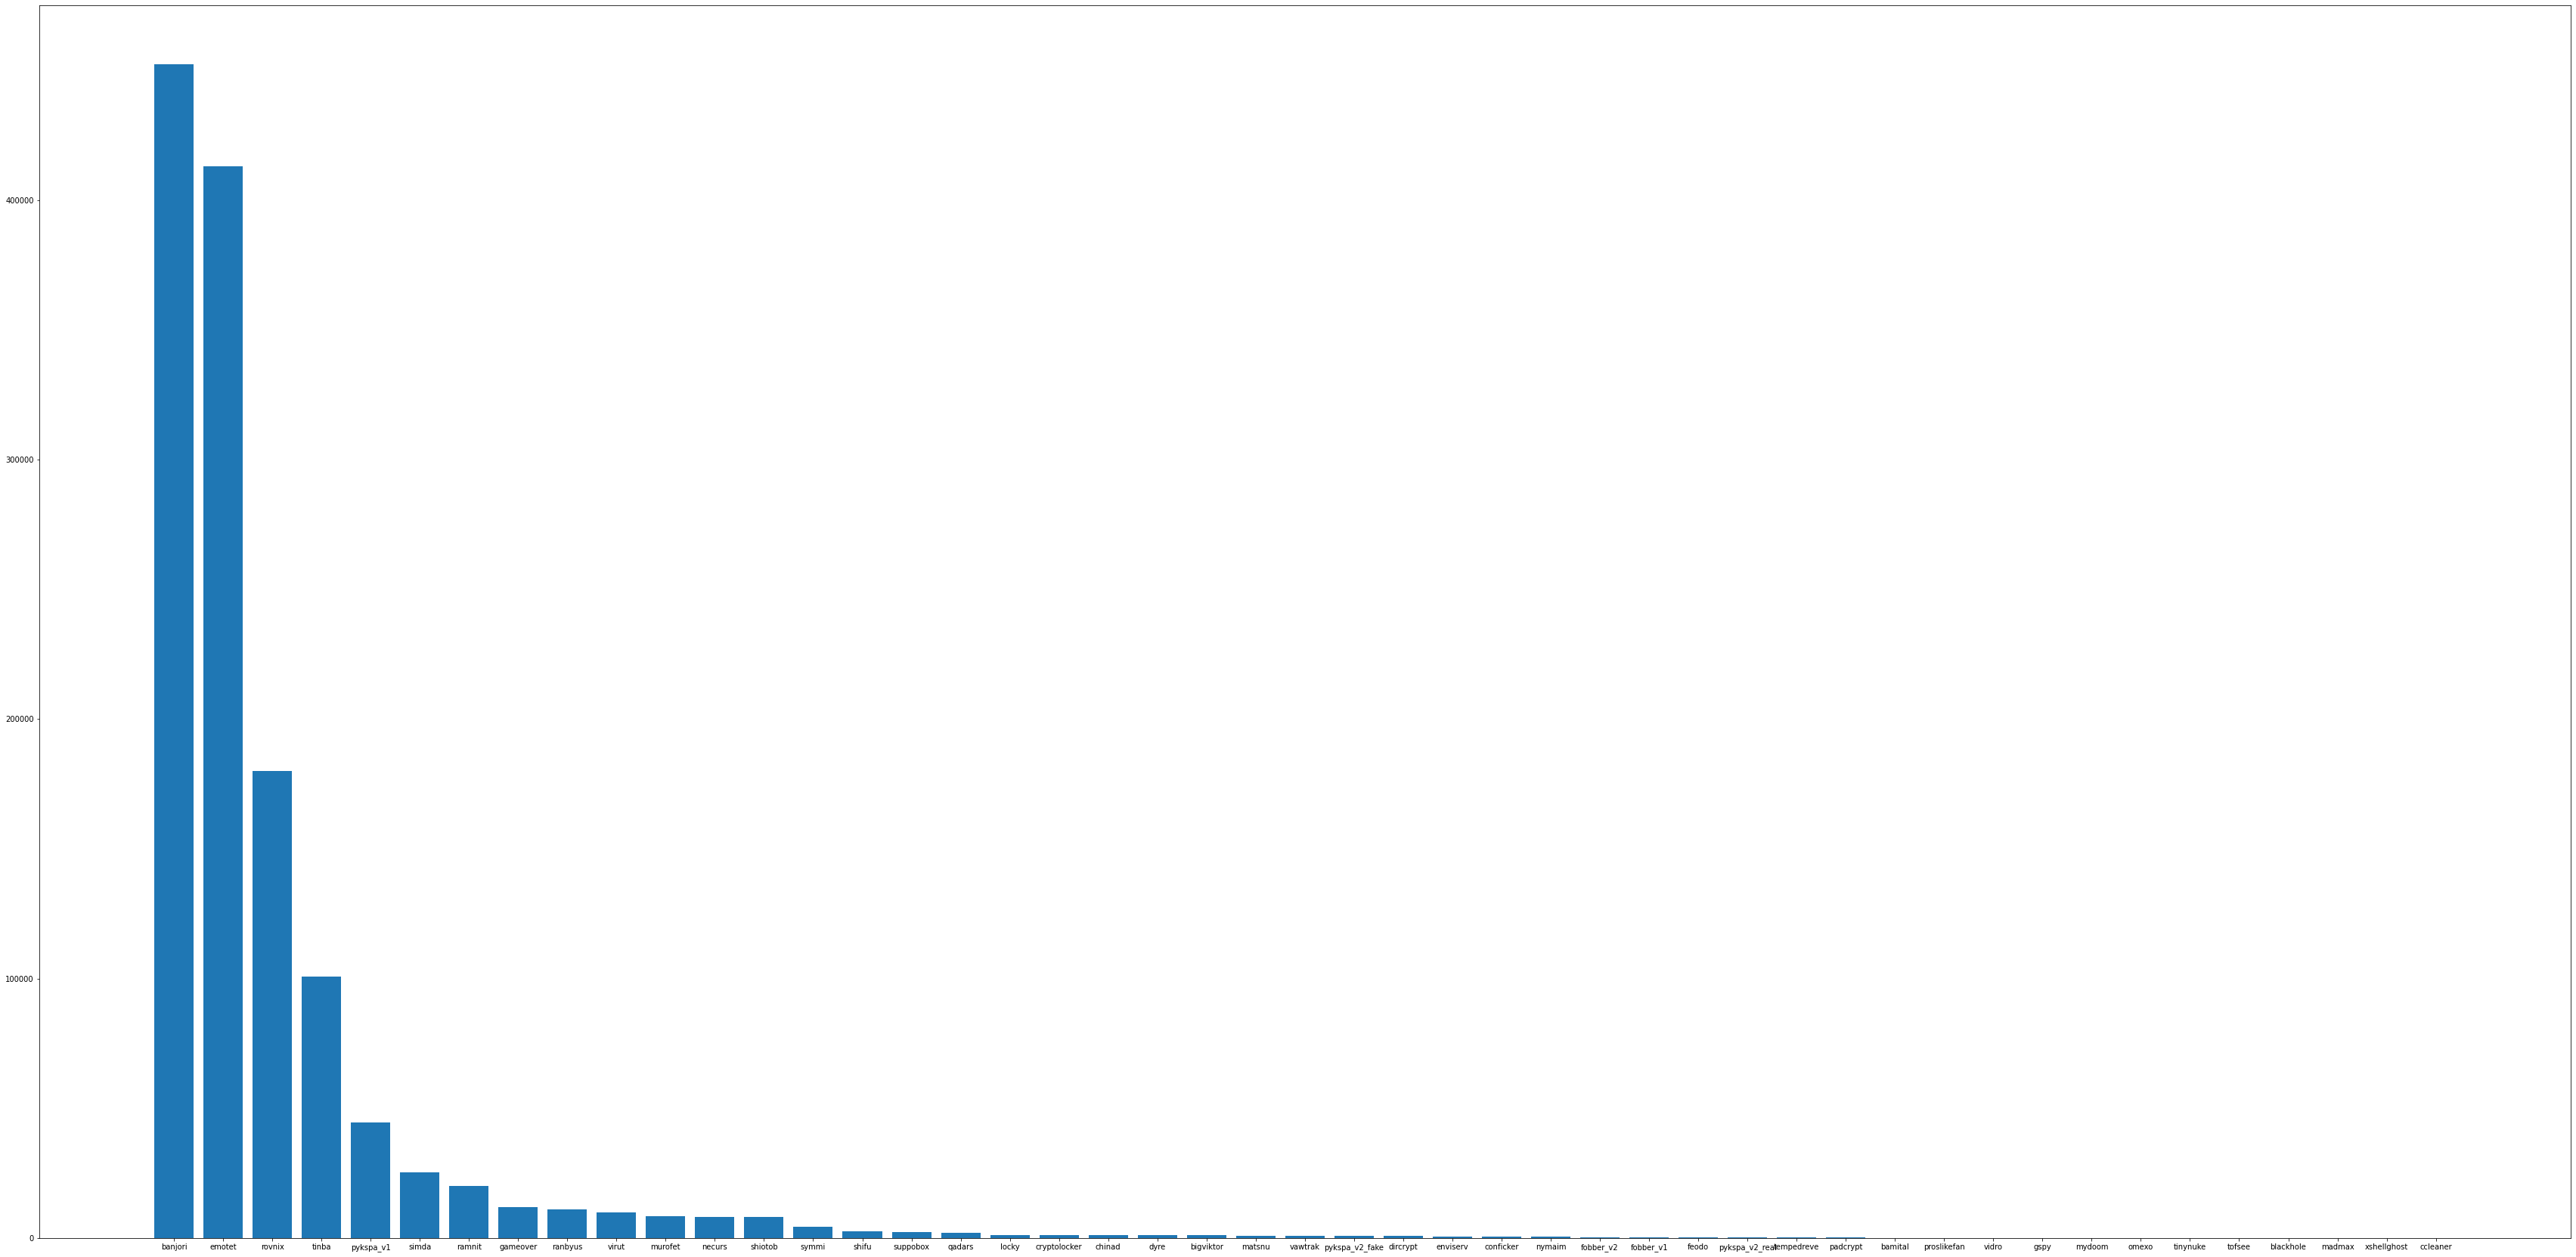

In [4]:
dga_counts = Counter(dga_df.family).most_common()
print(dga_counts)
plt.figure(figsize=(60, 30))
plt.bar([x[0] for x in dga_counts], [x[1] for x in dga_counts]);

## Create labeled dataset
  - Add alexa + dga.
  - Note that the netlab360_dga is class-imbalanced, so that should be accounted for, when creating the training dataset.
    - Mix with other DGA datasets?
    - Pick with 100,000 from the top 4 families (banjori, emotet, rovnix, tinba)
    

In [100]:
top_sample_count = 100000 # number of samples to take from the top 1M data
top_df_sample = top_df.loc[0:top_sample_count-1].copy() # only take top domains
top_df_sample['class'] = 0
top_df_sample['family'] = 'legit'

dga_sample_count = 100000 # number of samples to take from the dga data
dga_df_sample = dga_df.sample(dga_sample_count) # randomly sample
dga_df_sample['class'] = 1

labeled_df = pd.concat([top_df_sample[['domain', 'class', 'family']], dga_df_sample[['domain', 'class', 'family']]])
labeled_df.reset_index(inplace=True)
labeled_df.drop('index', axis=1,inplace=True)

labeled_df.domain.str.lower()
labeled_df

,domain,class,family
0,google.com,0,legit
1,youtube.com,0,legit
2,tmall.com,0,legit
3,baidu.com,0,legit
4,qq.com,0,legit
...,...,...,...
199995,ktedjlhnsyjdpelx.eu,1,emotet
199996,wcucoaiugkeq.info,1,pykspa_v1
199997,xduhgshfcbyy.in,1,tinba
199998,pfbcpylrc.com,1,ramnit


# Approach
## Considerations
- The method should have low false positive rate: it is important not to detect legitimate domains as DGA
  - Should we have also have a white-list?
- We should extract enough features, but not too many: too many features can result in over-fitting.
- Ensemble of several methods.


## Alternatives
1. Features: Use word statistics from n-grams and dictionary:
  - Model selection: use a classifier (logistic regression,  CART (classification & regression tree), random forest, etc.)
1. Feature less: Using a Hidden Markov Model (HMM) or recurrent neural network (LSTM)
  - train on character level (feature-less): example papers in references.
1. Hybrid
  - LSTM/HMM, trained on n-grams?

## Approach 1: Using Features
  - remove TLD (what is special about .ddns.net ?)
  - Which features to extract: i.e. what makes the difference between legit vs malicious?
    - length
    - letter counts: numbers, vowels, etc. (ratio to the total length)
    - n-grams: (n = 1, 2, 3, 4, ...)
      - pick the top ones (remove outliers?)
    - number of matches with dictionary (what language? length of words?)

### compute general stats

In [101]:
labeled_df['length'] = [len(domain) for domain in labeled_df.domain]
labeled_df['digit_freq'] = [sum(map(domain.count, "0123456789")) / len(domain) for domain in labeled_df.domain]
labeled_df['vowel_freq'] = [sum(map(domain.count, "aeiou")) / len(domain) for domain in labeled_df.domain]

labeled_df

,domain,class,family,length,digit_freq,vowel_freq
0,google.com,0,legit,10,0.0,0.400000
1,youtube.com,0,legit,11,0.0,0.454545
2,tmall.com,0,legit,9,0.0,0.222222
3,baidu.com,0,legit,9,0.0,0.444444
4,qq.com,0,legit,6,0.0,0.166667
...,...,...,...,...,...,...
199995,ktedjlhnsyjdpelx.eu,1,emotet,19,0.0,0.210526
199996,wcucoaiugkeq.info,1,pykspa_v1,17,0.0,0.470588
199997,xduhgshfcbyy.in,1,tinba,15,0.0,0.133333
199998,pfbcpylrc.com,1,ramnit,13,0.0,0.076923


### compute n-gram stats

In [28]:
# get the n-grams for the input string and n, as a list of strings
def get_ngrams(full_domain, n):
    domain = full_domain.split('.')[0]
    return [''.join(x) for x in ngrams(domain, n)]
print(get_ngrams('google.com', 2))

['go', 'oo', 'og', 'gl', 'le']


### extracting features based on n-grams
We will compute the n-grams scores based on the n-grams extracted from a portion (the training set) of the top-1M domains as we also want to evaluate the false-positive rate (detecting legits as dga).


#### Split data to train and test

In [160]:
# n's for which we want to compute the n-grams
n_range = range(1, 6) #1-gram to 5-gram
for n in n_range:
    labeled_df[f'{n}gram'] = 0

X_train, X_test, y_train, y_test = train_test_split(labeled_df,
                                                    labeled_df['class'].copy(), random_state=42)
# hack to prevent the warning later (https://stackoverflow.com/questions/45090639/pandas-shows-settingwithcopywarning-after-train-test-split)
X_train = X_train.copy()
X_test = X_test.copy()

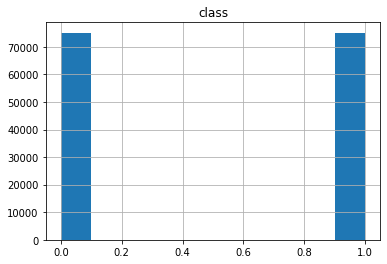

In [141]:
X_train.hist(column='class');

In [168]:
# computes the n-gram score for a domain
def compute_ngram_score(full_domain, n, ngram_dict):
    ngrams = get_ngrams(full_domain, n)
    score = sum([(1.0 if ng in ngrams_dict else 0) for ng in ngrams])
    return np.log10(0.0001 + score / (len(ngrams) + 0.0001)) # normalize by number of n-grams

In [169]:
legit_domains = X_train.loc[X_train['class']==0]['domain']
print('computing the n-grams ...')
for n in n_range: # n-gram range
    # compute the n-gram dictionary for this n
    ngrams_dict = {}
    for full_domain in legit_domains:
        for ng in get_ngrams(full_domain, n):
            ngrams_dict[ng] = ngrams_dict.get(ng, 0) + 1
    print(f'{n}-gram dictionary size: {len(ngrams_dict)}')
    print(f'calculating {n}-grams for all domains...')
    X_train[f'{n}gram'] = [compute_ngram_score(domain, n, ngrams_dict) for domain in X_train.domain]
    X_test[f'{n}gram'] = [compute_ngram_score(domain, n, ngrams_dict) for domain in X_test.domain]

X_train

computing the n-grams ...
1-gram dictionary size: 37
calculating 1-grams for all domains...
2-gram dictionary size: 1360
calculating 2-grams for all domains...
3-gram dictionary size: 20320
calculating 3-grams for all domains...
4-gram dictionary size: 90254
calculating 4-grams for all domains...
5-gram dictionary size: 180820
calculating 5-grams for all domains...


,domain,class,family,length,digit_freq,vowel_freq,1gram,2gram,3gram,4gram,5gram
21743,uniftc.edu.br,0,legit,13,0.000000,0.307692,0.000036,0.000035,0.000033,0.000029,0.000022
124554,fmuulorlrvrbbues.eu,1,emotet,19,0.000000,0.368421,0.000041,0.000041,-0.032141,-0.636637,-4.000000
10351,aladdin-e.com,0,legit,13,0.000000,0.384615,0.000039,0.000038,0.000037,0.000036,0.000035
135164,crjuyyyosjzh5g4vaa.biz,1,rovnix,22,0.090909,0.227273,0.000041,0.000041,-0.358925,-4.000000,-4.000000
49969,inpcut.com,0,legit,10,0.000000,0.300000,0.000036,0.000035,0.000033,0.000029,0.000022
...,...,...,...,...,...,...,...,...,...,...,...
119879,eozhellefrictionlessv.com,1,banjori,25,0.000000,0.360000,0.000041,0.000041,0.000041,-0.051106,-0.327269
103694,oldyxrkhkeontlei.eu,1,emotet,19,0.000000,0.368421,0.000041,0.000041,-0.104683,-0.335701,-4.000000
131932,mgnygueoya.info,1,pykspa_v1,15,0.000000,0.400000,0.000039,0.000039,0.000038,-0.543922,-4.000000
146867,iamdanarianaqh.com,1,banjori,18,0.000000,0.444444,0.000040,0.000040,-0.037745,-0.087101,-0.397836


#### plot the features for test data

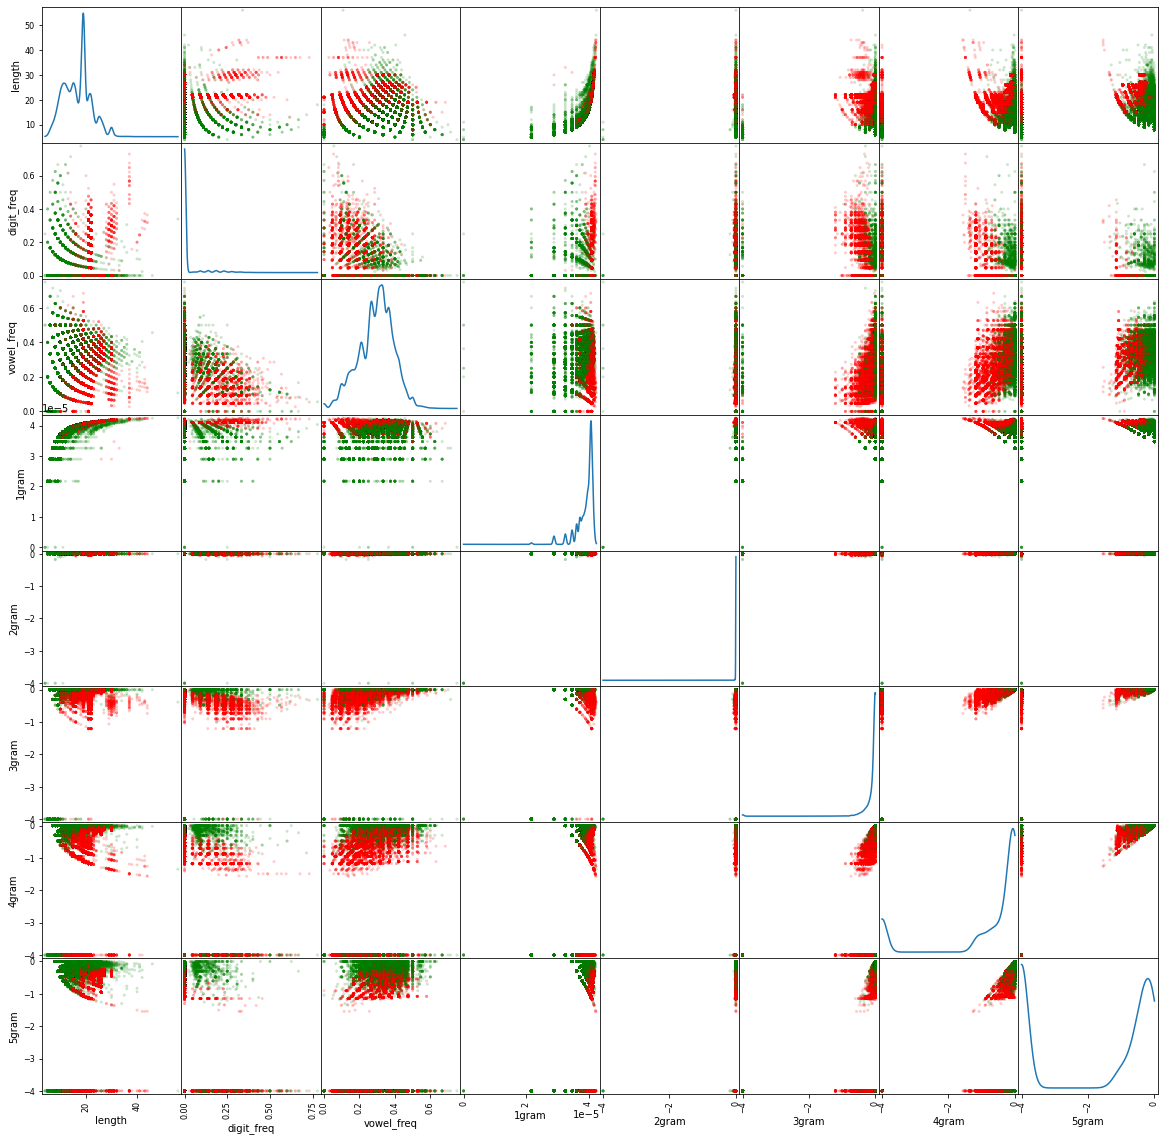

In [175]:
class_colors=['green' if c == 0 else 'red' for c in X_test['class']]
pd.plotting.scatter_matrix(X_test.drop(['domain', 'class', 'family'], axis=1),
                           figsize=(20, 20),
                           diagonal='kde', #'hist'
                           alpha=0.2, 
                           c=class_colors);

legend<br>
<font color="green">Green: legit</font><br>
<font color="red">Red: DGA </font>

### Building a preliminary model
First drop the none-feature columns from X_train and X_test

In [179]:
X_train.drop(['domain', 'class', 'family'], axis=1, inplace=True)
X_test.drop(['domain', 'class', 'family'], axis=1, inplace=True)

#### Logistic Regression classifier

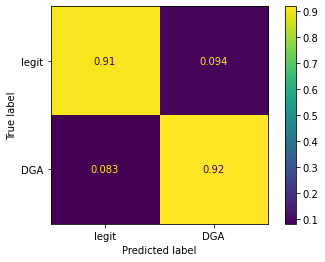

In [220]:
clf_lr = LogisticRegression(random_state=0).fit(X_train, y_train)
plot_confusion_matrix(clf_lr, 
                      X_train, y_train, 
                      normalize='true',
                      display_labels=["legit", "DGA"]);

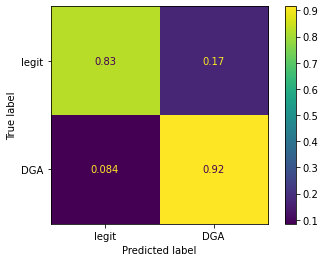

In [222]:
plot_confusion_matrix(clf_lr, 
                      X_test, y_test, 
                      normalize='true',
                      display_labels=["legit", "DGA"]);

#### Decision Tree classifier

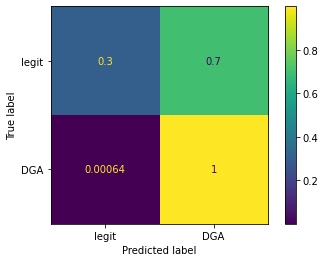

In [187]:
clf_dt = DecisionTreeClassifier(random_state=42) # a classifier decision tree
clf_dt = clf_dt.fit(X_train, y_train)
plot_confusion_matrix(clf_dt, 
                      X_test, y_test, 
                      normalize='true',
                      display_labels=["legit", "DGA"]);

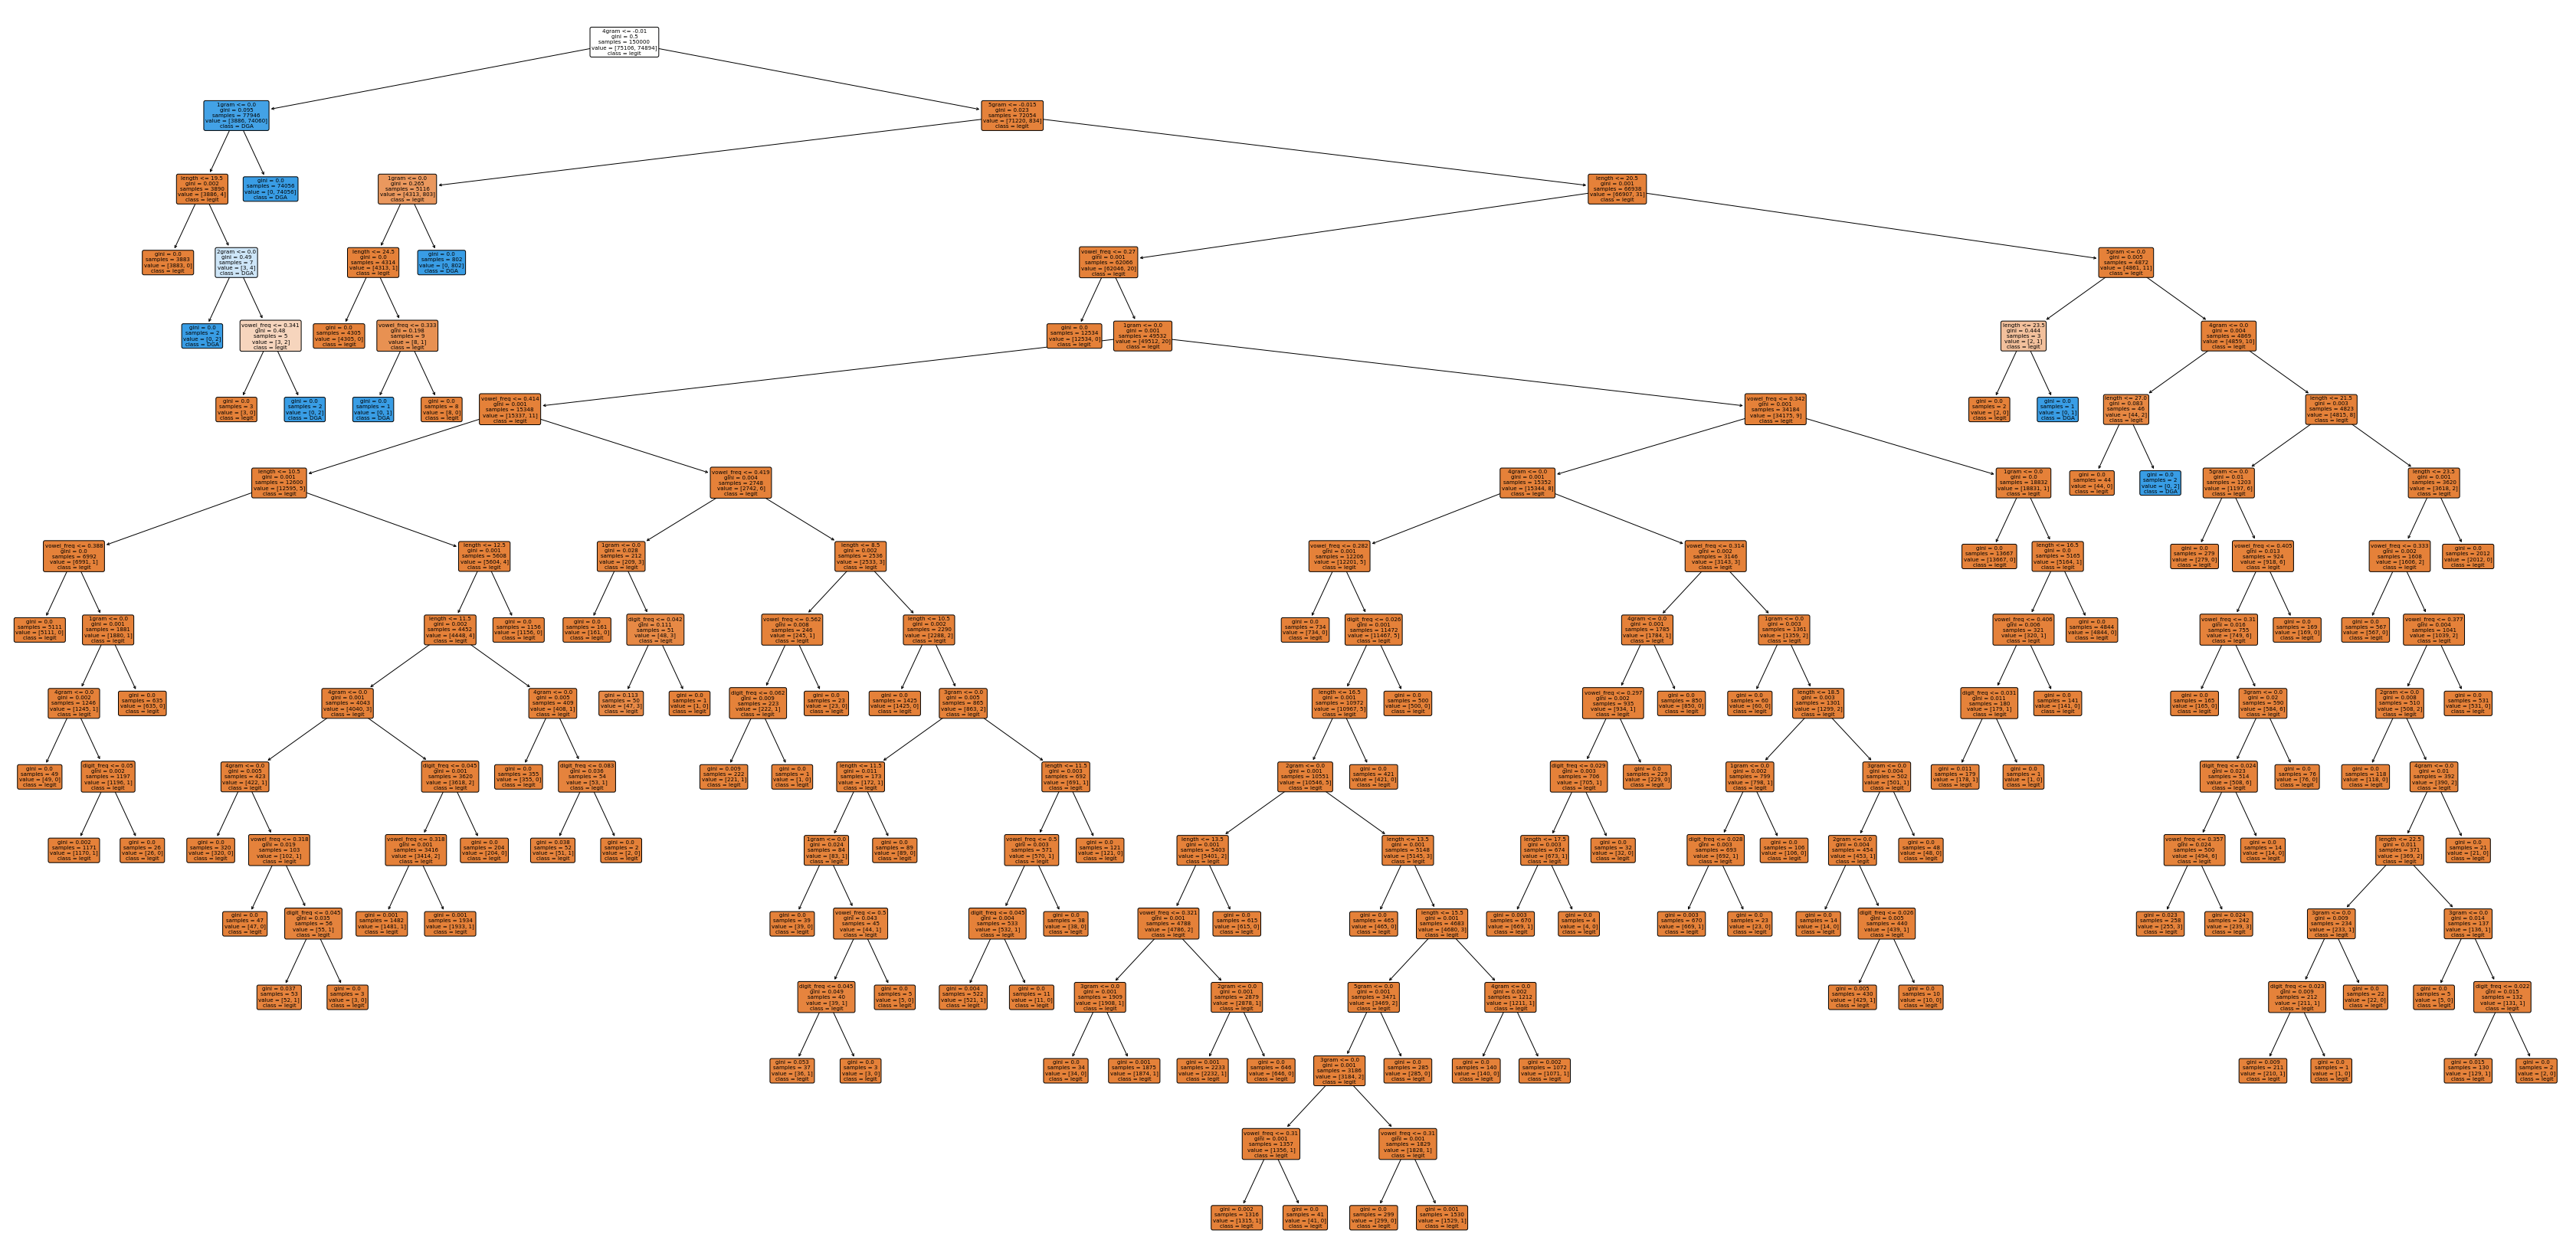

In [188]:
plt.figure(figsize=(60, 30), facecolor='white')
clf_dt_plt = plot_tree(clf_dt, 
                       filled=True, rounded=True, 
                       class_names=["legit", "DGA"], 
                       feature_names=X_train.columns)

#### Decision tree classifier with cost complexity pruning
Decision trees are notorious for over-fitting. We use cost complexity pruning to reduce variance.

In [191]:
ccp_path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = ccp_path.ccp_alphas[:-1] # exclude the maximum alpha value (to keep root's children)

In [192]:
clf_dts = []
for ccp_alpha in ccp_alphas:
    cdt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dts.append(cdt.fit(X_train, y_train))

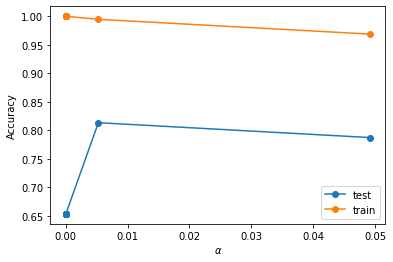

In [193]:
train_scores = [cdt.score(X_train, y_train) for cdt in clf_dts]
test_scores = [cdt.score(X_test, y_test) for cdt in clf_dts]
plt.plot(ccp_alphas, test_scores, marker='o', label='test');
plt.plot(ccp_alphas, train_scores, marker='o', label='train');
plt.xlabel('$\\alpha$')
plt.ylabel('Accuracy')
plt.legend();

We now do cross validation to find the best alpha.

In [194]:
alpha_loop_values = [] # keep scores for each cross validation
for ccp_alpha in ccp_alphas:
    cdt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(cdt, X_train, y_train, cv = 5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

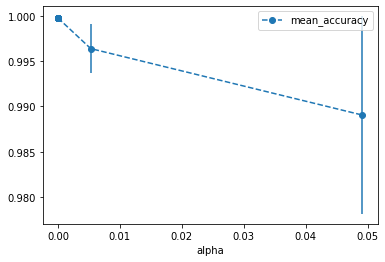

In [195]:
alpha_results_df = pd.DataFrame(alpha_loop_values, columns=["alpha", "mean_accuracy", "std"])
alpha_results_df.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--');

In [212]:
max_accuracy_index = np.argmax(alpha_results_df.mean_accuracy)
print(alpha_loop_values[max_accuracy_index])
ideal_ccp_alpha = alpha_loop_values[max_accuracy_index][0] # ideal value for alpha

[0.0, 0.99976, 9.977753031396079e-05]


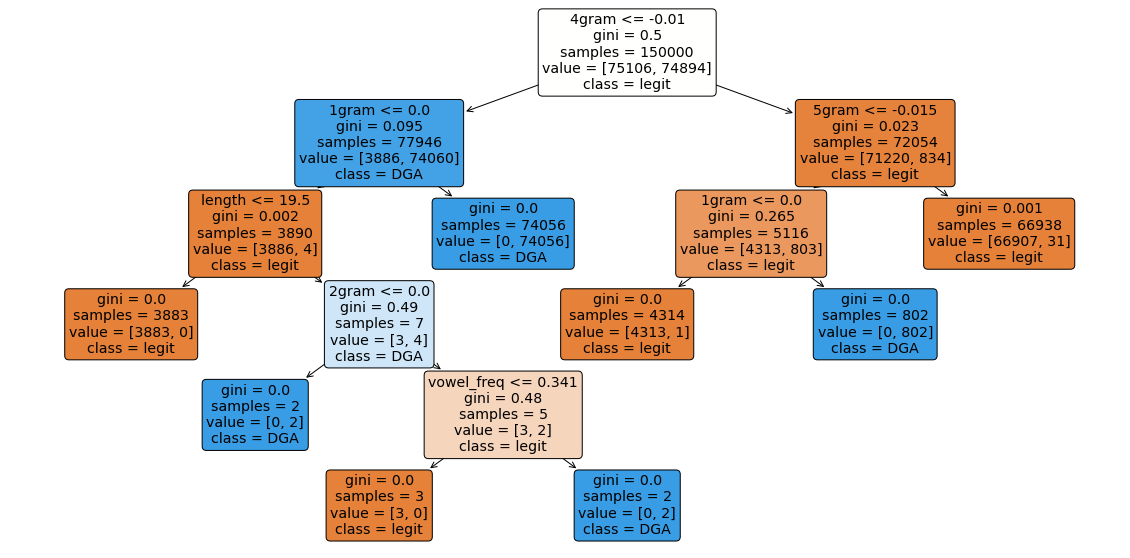

In [214]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=0.00001);
clf_dt_pruned.fit(X_train, y_train);
plt.figure(figsize=(20, 10), facecolor='white')
plot_tree(clf_dt_pruned, 
          feature_names=X_train.columns,
          class_names=['legit', 'DGA'],
          filled=True, rounded=True);

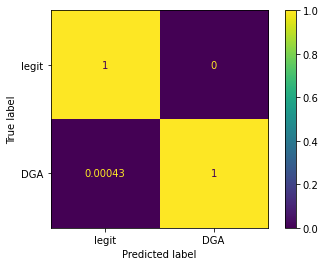

In [219]:
plot_confusion_matrix(clf_dt_pruned, 
                      X_train, y_train, 
                      normalize='true',
                      display_labels=['legit', 'DGA']);

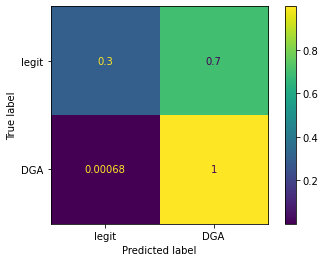

In [218]:
plot_confusion_matrix(clf_dt_pruned, 
                      X_test, y_test, 
                      normalize='true',
                      display_labels=['legit', 'DGA']);

### Conclusion
So far logistic regression classifier is outperforming the decision tree one, mostly due to the over-fitting.
This needs further investigation and probably parameter tuning.

# References and Further Reading
 - Domain Generation Algorithms (DGAs) of Malware reimplemented in Python. ([github](https://github.com/baderj/domain_generation_algorithms))
 - Predicting Domain Generation Algorithms with Long Short-Term Memory Networks: ([PDF](https://arxiv.org/abs/1611.00791))
 - From Throw-Away Traffic to Bots: Detecting the Rise of DGA-Based Malware ([PDF](https://www.usenix.org/system/files/conference/usenixsecurity12/sec12-final127.pdf))
 - netlab 360 DGA Families ([+data](https://data.netlab.360.com/dga/))
